In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('Housing.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
dataset.shape

(545, 13)

# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
dataset['mainroad'] = le.fit_transform(dataset['mainroad'])

In [14]:
dataset['guestroom'] = le.fit_transform(dataset['guestroom'])

In [16]:
columns_to_encode = ['basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in columns_to_encode:
  dataset[col] = le.fit_transform(dataset[col])

In [18]:
dataset['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [19]:
label_mapping = {'unfurnished' : 0, 'semi-furnished' : 1, 'furnished' : 2}
dataset['furnishingstatus'] = dataset['furnishingstatus'].map(label_mapping)

In [20]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


# Plotting the dataset

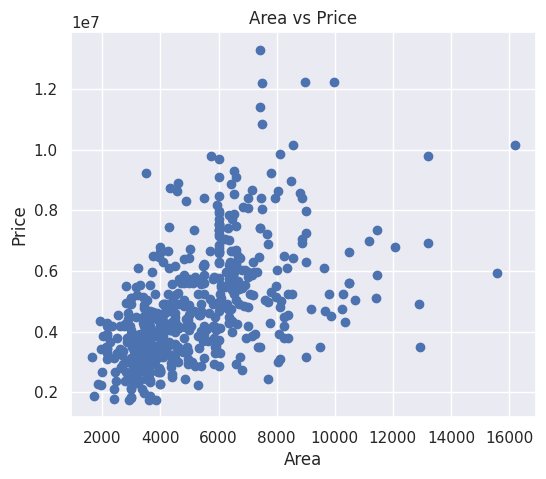

In [77]:
plt.figure(figsize=(6, 5))
plt.scatter(dataset['area'], dataset['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()

<Axes: xlabel='bedrooms', ylabel='count'>

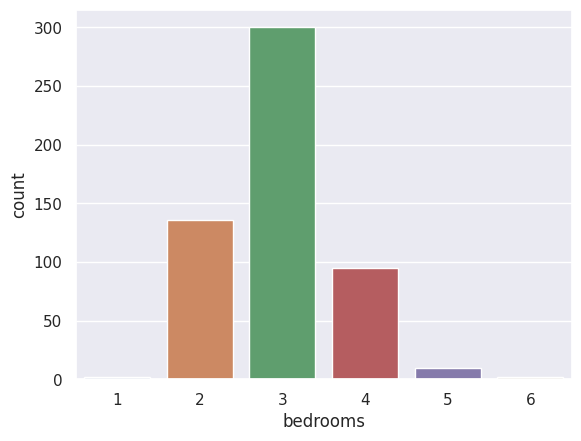

In [24]:
sns.set()
sns.countplot(x='bedrooms', data=dataset)

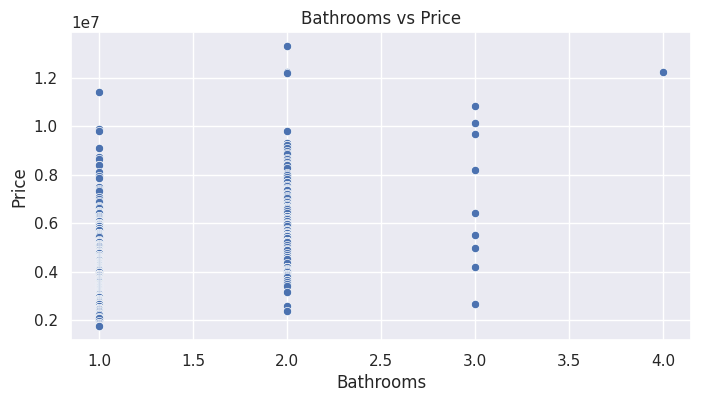

In [78]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=dataset, x='bathrooms', y='price', marker='o')
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Bathrooms vs Price")
plt.show()

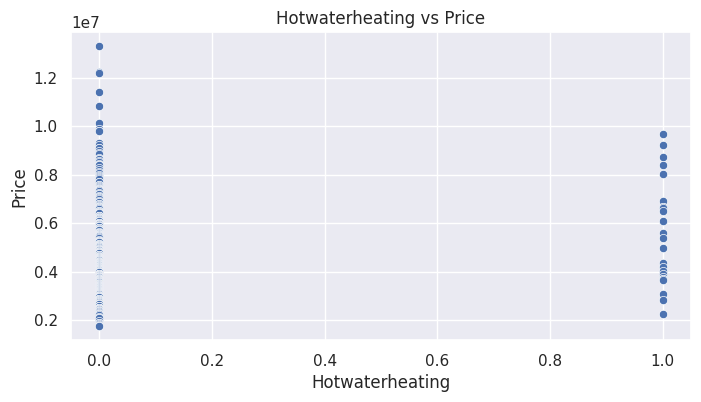

In [79]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=dataset, x='hotwaterheating', y='price', marker='o')
plt.xlabel("Hotwaterheating")
plt.ylabel("Price")
plt.title("Hotwaterheating vs Price")
plt.show()

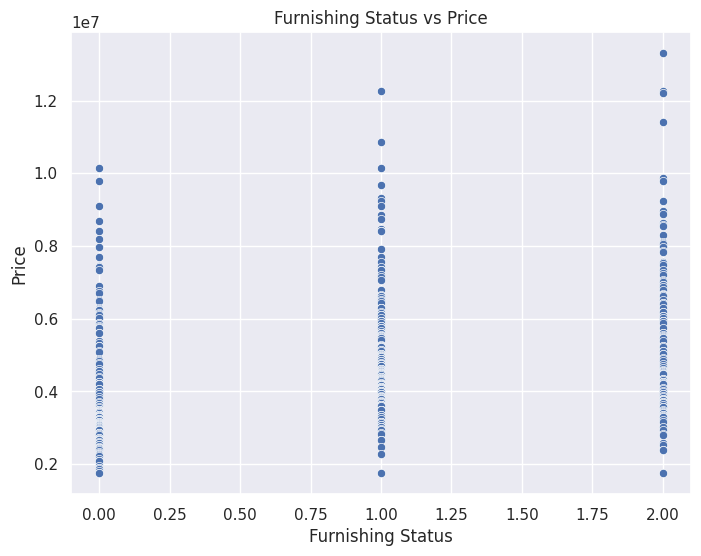

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='furnishingstatus', y='price', marker='o')
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.title("Furnishing Status vs Price")
plt.show()

# Feature and Target split

In [31]:
X = dataset.drop('price', axis=1)

In [32]:
X.shape

(545, 12)

In [33]:
y = dataset['price']

# Train Test *Split*

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train.shape

(436, 12)

In [36]:
X_test.shape

(109, 12)

In [37]:
Y_train.shape

(436,)

In [38]:
Y_test.shape

(109,)

# Using Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
def pricing(model):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)
  model.fit(X_train, y_train)
  print("Accuracy : ", model.score(X_test, y_test))
  #score = cross_val_score(model, X, y)
  #print("CV : ", np.mean(score))

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [45]:
pricing(model)

Accuracy :  0.7193413362191168


In [58]:
reg = LinearRegression()

In [60]:
model.fit(X, y)

LinearRegression()

In [61]:
model.predict(X_test)

array([6912814.37684577, 3658301.62443956, 3433214.92366425,
       3996445.53237827, 4919530.77440225, 2935377.98365843,
       6401532.2428904 , 5580215.99533338, 4077256.30003177,
       4301223.96806274, 4869375.34155393, 3087589.04329893,
       5269093.58524216, 3630751.4218819 , 3801320.02256314,
       4420537.76833812, 3615090.27896486, 5428918.58764163,
       3325167.51348354, 4056328.29126006, 3810215.78877998,
       7501266.00075274, 3085109.98613187, 4297900.7608001 ,
       4787536.8399577 , 6852164.85075369, 4821464.3445833 ,
       2666836.50077537, 4612590.30681597, 3577801.89841507,
       4175947.31716565, 6083620.53210939, 3091016.90170539,
       3737106.36170164, 4114585.32948765, 4645162.37856934,
       2085440.1897813 , 3993469.6758414 , 4909471.15270263,
       3197881.22147516, 5923599.50265678, 2876133.04774052,
       3104595.74218525, 4411960.74411578, 3560615.74465922,
       4158371.15568818, 2762204.09369751, 3533062.43486171,
       3186449.41760402,

In [62]:
model.predict([[1000, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5236134.18181072])

In [75]:
out = pd.DataFrame({'actual': Y_test, 'predicted': model.predict(X_test)})
out.to_csv("./predicted_values/predic.csv", index=False)

In [63]:
model.score(X_test, Y_test)

0.7243761509274096

# Using Random Forest Algorithm

In [64]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [65]:
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [69]:
predictions = reg.predict(X_test)

In [67]:
reg.score(X_test, Y_test)

0.7145764820121491

In [68]:
reg.predict([[1000, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4505028.5])

In [73]:
output_data = pd.DataFrame({'actual' : Y_test, 'predicted' : predictions})

In [74]:
output_data.to_csv("./predicted_values/pred.csv", index=False)